In [1]:
from qiskit import *

In [23]:
n=int(input('enter the number of you want to entangle in GHZ gate: '))
circuit = QuantumCircuit(n,n)

enter the number of you want to entangle in GHZ gate: 5


In [24]:
circuit.draw()

In [25]:
circuit.h(0)
for i in range(n-1):
    circuit.cx(i,i+1)
circuit.draw()

In [26]:
for i in range(n):
    circuit.measure(i,i)
circuit.draw()

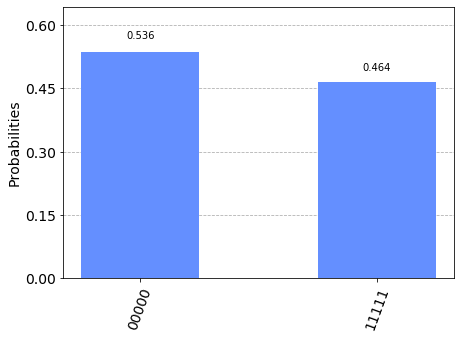

In [27]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots=1024).result()
count = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(count)

In [28]:
IBMQ.load_account()

/Users/sammithsbharadwaj/opt/anaconda3/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
provider = IBMQ.get_provider('ibm-q')

In [10]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [11]:
job = execute(circuit,backend=qcomp)

In [12]:
from qiskit.tools.monitor import job_monitor

In [13]:
job_monitor(job)

Job Status: job has successfully run


In [15]:
result = job.result(job)

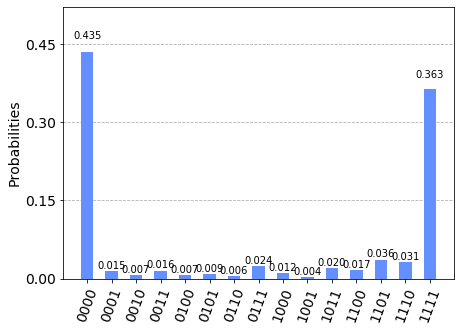

In [17]:
plot_histogram(result.get_counts(circuit))